# Taller Práctico: Estadística Descriptiva y Visualización
Este notebook es un taller práctico para aplicar conceptos de estadística descriptiva y reforzarlos con visualizaciones usando Matplotlib y Seaborn.

### 1. Configuración Inicial
**Tarea:** Importa las librerías necesarias: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn` y `scipy.stats`.

In [1]:
# Tu código aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.model_selection import train_test_split


### 2. Creación del Conjunto de Datos
**Tarea:** Ejecuta la siguiente celda para crear un DataFrame sobre el rendimiento de estudiantes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid')
np.random.seed(42)

n_estudiantes = 100
data = {
    'Horas_Estudio': np.random.normal(15, 5, n_estudiantes).clip(2, 30),
    'Calificacion_Anterior': np.random.normal(70, 10, n_estudiantes).clip(40, 100),
    'Faltas_Asistencia': np.random.randint(0, 10, n_estudiantes),
    'Usa_Tutor': np.random.choice(['Sí', 'No'], n_estudiantes, p=[0.35, 0.65])
}
df_estudiantes = pd.DataFrame(data)

# Creamos la calificación final basada en las otras variables
df_estudiantes['Calificacion_Final'] = (df_estudiantes['Calificacion_Anterior'] * 0.5 +
                                       df_estudiantes['Horas_Estudio'] * 1.5 -
                                       df_estudiantes['Faltas_Asistencia'] * 2 +
                                       np.random.normal(0, 5, n_estudiantes)).clip(0, 100)

print('DataFrame de estudiantes creado:')
df_estudiantes.head()

DataFrame de estudiantes creado:


,Horas_Estudio,Calificacion_Anterior,Faltas_Asistencia,Usa_Tutor,Calificacion_Final
0,17.483571,55.846293,1,Sí,53.597916
1,14.308678,65.793547,9,No,35.423666
2,18.238443,66.572855,0,No,51.927665
3,22.615149,61.977227,7,Sí,56.258727
4,13.829233,68.387143,0,Sí,54.118095


### 3. Medidas de Tendencia Central y su Visualización
**Tarea:**
1. Calcula la **media**, **mediana** y **moda** de la columna `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final` usando `sns.histplot`.
3. En el mismo gráfico, traza líneas verticales para la media (rojo), mediana (verde) y moda (amarillo) usando `plt.axvline()`.

Media de Calificación Final: 46.97
Mediana de Calificación Final: 48.22
Moda de Calificación Final:
18.498193
20.100809
20.189143
23.584595
24.963774
27.832969
28.248890
29.099575
29.892072
30.578185
31.061704
31.451753
32.142906
32.587610
33.308094
33.861034
33.953856
34.299115
34.930699
35.423666
35.719323
36.275713
36.320638
37.321059
37.567505
37.700987
39.134990
40.065301
40.243592
40.326349
40.503672
40.525547
40.632278
41.679332
41.762395
42.383657
42.820192
43.337086
44.882825
44.958705
45.372790
45.857344
45.951597
46.460194
46.544665
46.618742
47.731310
47.763572
48.092186
48.156463
48.288800
48.433794
48.475247
48.972618
49.223898
49.408109
49.432144
49.488033
49.904784
50.311931
50.499843
50.666125
51.004347
51.068117
51.446386
51.630240
51.927665
52.584845
52.597264
52.964218
53.264525
53.597916
54.118095
55.313826
55.477986
56.255739
56.258727
56.403294
57.734863
57.754410
58.489421
58.800268
58.986026
59.169996
59.817477
60.116725
60.808595
61.145498
61.307498
61.504240


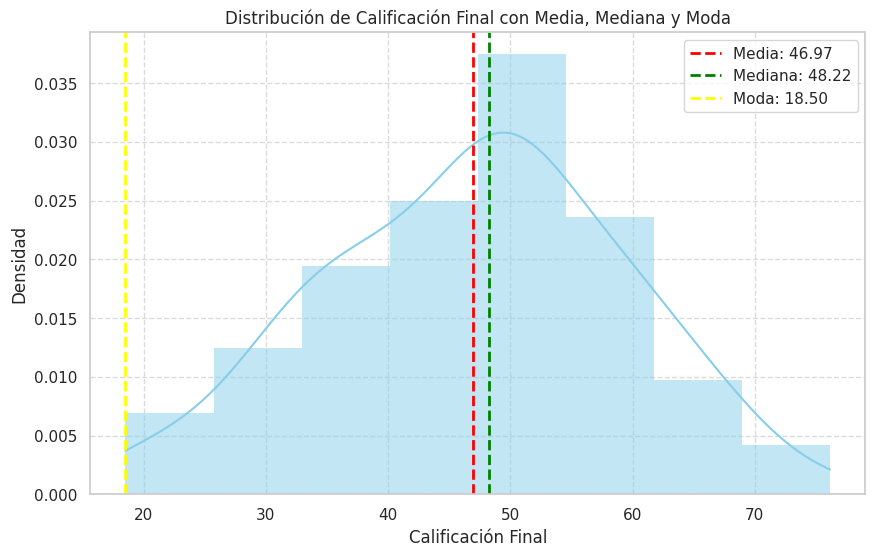

In [3]:
# Tu código aquí
media_calificacion_final = df_estudiantes['Calificacion_Final'].mean()
mediana_calificacion_final = df_estudiantes['Calificacion_Final'].median()
moda_calificacion_final = df_estudiantes['Calificacion_Final'].mode()

print(f"Media de Calificación Final: {media_calificacion_final:.2f}")
print(f"Mediana de Calificación Final: {mediana_calificacion_final:.2f}")
print(f"Moda de Calificación Final:\n{moda_calificacion_final.to_string(index=False)}")

plt.figure(figsize=(10, 6))
sns.histplot(df_estudiantes['Calificacion_Final'], kde=True, color='skyblue', stat='density', linewidth=0)

plt.axvline(media_calificacion_final, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_calificacion_final:.2f}')
plt.axvline(mediana_calificacion_final, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_calificacion_final:.2f}')
# Si hay múltiples modas (como en este caso al no haber valores repetidos), tomamos la primera para la visualización.
if not moda_calificacion_final.empty:
    plt.axvline(moda_calificacion_final.iloc[0], color='yellow', linestyle='dashed', linewidth=2, label=f'Moda: {moda_calificacion_final.iloc[0]:.2f}')

plt.title('Distribución de Calificación Final con Media, Mediana y Moda')
plt.xlabel('Calificación Final')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

La gráfica muestra cómo se están comportando realmente las notas del grupo. La media (46.97) es el promedio general: nos dice, en pocas palabras, que el rendimiento global está un poco por debajo de lo ideal. La mediana (48.22) está un poco por encima del promedio, lo que significa que la mayoría de estudiantes tiene notas ligeramente mejores que ese promedio, pero algunos resultados muy bajos jalan la media hacia abajo. La moda, al tener muchos valores distintos sin repetirse, nos deja ver que no hay una nota típica o frecuente: todos están sacando resultados muy variados. En conjunto, esto refleja un grupo con desempeño muy disperso, donde no todos avanzan al mismo ritmo. Desde una mirada más humana y de “negocio educativo”, esto indica que varios estudiantes necesitan más apoyo para no quedarse atrás, mientras que la estrategia general debería buscar equilibrar el nivel del grupo para que las diferencias no sigan creciendo.

### 4. Medidas de Dispersión y su Visualización
**Tarea:**
1. Calcula la **varianza** y la **desviación estándar** de `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final`.
3. Añade una línea vertical para la media.
4. Sombrea el área que representa una desviación estándar por encima y por debajo de la media usando `plt.axvspan()`.

Varianza de Calificación Final: 150.21
Desviación Estándar de Calificación Final: 12.26


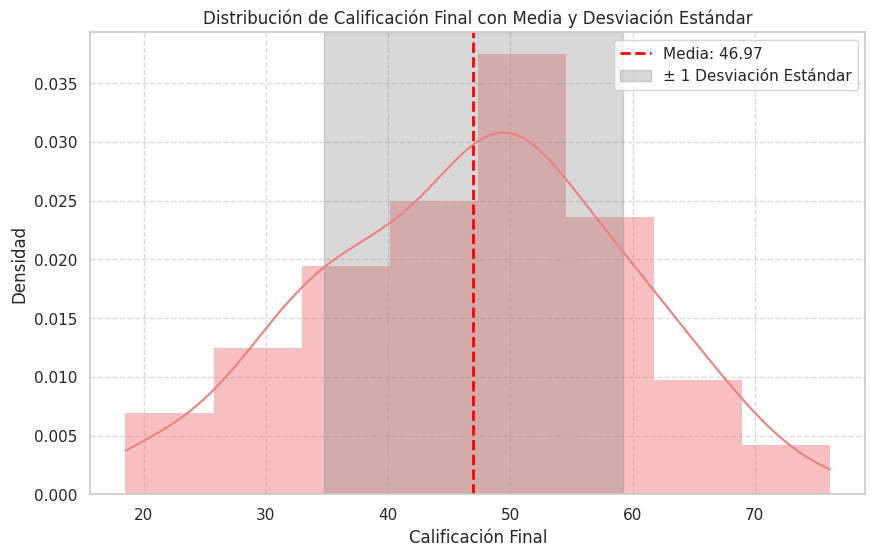

In [4]:
# Tu código aquí
varianza_calificacion_final = df_estudiantes['Calificacion_Final'].var()
desviacion_estandar_calificacion_final = df_estudiantes['Calificacion_Final'].std()

print(f"Varianza de Calificación Final: {varianza_calificacion_final:.2f}")
print(f"Desviación Estándar de Calificación Final: {desviacion_estandar_calificacion_final:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(df_estudiantes['Calificacion_Final'], kde=True, color='lightcoral', stat='density', linewidth=0)

# Línea vertical para la media
plt.axvline(media_calificacion_final, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_calificacion_final:.2f}')

# Sombreado para una desviación estándar por encima y por debajo de la media
plt.axvspan(media_calificacion_final - desviacion_estandar_calificacion_final,
            media_calificacion_final + desviacion_estandar_calificacion_final,
            color='gray', alpha=0.3, label='± 1 Desviación Estándar')

plt.title('Distribución de Calificación Final con Media y Desviación Estándar')
plt.xlabel('Calificación Final')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

La gráfica muestra la distribución de las notas junto con la media (46.97) y la desviación estándar (12.26), que técnicamente mide cuánto se alejan las calificaciones del promedio: un valor de desviación estándar alto indica gran dispersión, lo que aquí se refleja en un rango amplio de desempeño; desde el modelo de negocio, esto significa que el “producto” educativo no es uniforme, pues los estudiantes no están alcanzando resultados similares, lo que evidencia necesidades distintas, brechas de aprendizaje y la obligación de ajustar estrategias, recursos o intervenciones para lograr un grupo más equilibrado y mejorar la consistencia del rendimiento general.

### 5. Test de Normalidad (Analítico y Visual)
**Tarea:**
1. Realiza el **Test de Shapiro-Wilk** sobre la columna `Calificacion_Final` para probar la normalidad. Interpreta el p-valor.
2. Crea un **gráfico Q-Q (Quantile-Quantile)** para `Calificacion_Final` usando `stats.probplot`. Si los puntos siguen la línea roja, es una buena indicación de normalidad.

Test de Shapiro-Wilk:
 Estadístico = 0.991, p-valor = 0.755
Con un p-valor de 0.755 (> 0.05), no podemos rechazar la hipótesis nula. La distribución de 'Calificacion_Final' puede considerarse normal.


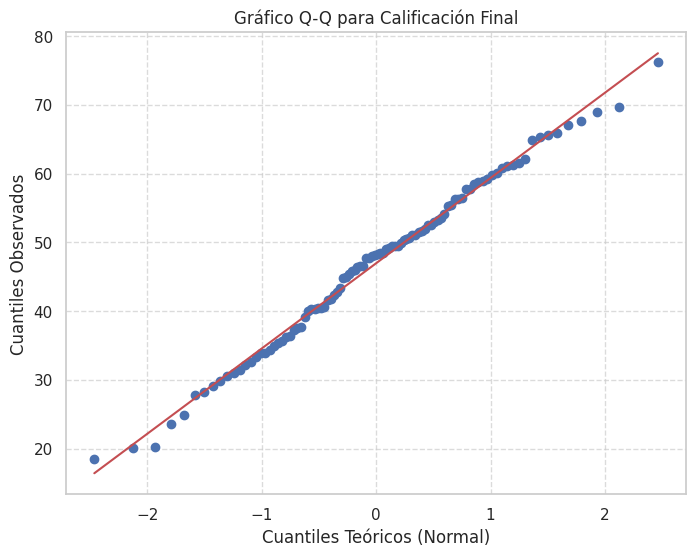

In [5]:
# Tu código aquí

# 1. Test de Shapiro-Wilk
shapiro_test = stats.shapiro(df_estudiantes['Calificacion_Final'])
stat, p_value = shapiro_test.statistic, shapiro_test.pvalue

print(f"Test de Shapiro-Wilk:\n Estadístico = {stat:.3f}, p-valor = {p_value:.3f}")

# Interpretación del p-valor
alpha = 0.05 # Nivel de significancia
if p_value > alpha:
    print(f"Con un p-valor de {p_value:.3f} (> {alpha}), no podemos rechazar la hipótesis nula. La distribución de 'Calificacion_Final' puede considerarse normal.")
else:
    print(f"Con un p-valor de {p_value:.3f} (<= {alpha}), rechazamos la hipótesis nula. La distribución de 'Calificacion_Final' probablemente no es normal.")

# 2. Gráfico Q-Q (Quantile-Quantile)
plt.figure(figsize=(8, 6))
stats.probplot(df_estudiantes['Calificacion_Final'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Calificación Final')
plt.xlabel('Cuantiles Teóricos (Normal)')
plt.ylabel('Cuantiles Observados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

El gráfico Q-Q y el test de Shapiro-Wilk muestran que los puntos siguen muy bien la línea teórica y el p-valor (0.755) es alto, lo que técnicamente indica que las calificaciones se comportan como una distribución normal; desde el modelo de negocio, esto significa que el desempeño del grupo es estable y predecible, ya que no hay sesgos fuertes ni concentraciones atípicas, lo cual permite tomar decisiones más confiables sobre políticas académicas, proyecciones de rendimiento o diseño de estrategias de apoyo basadas en un comportamiento estadístico regular.

### 6. Correlación entre Dos Variables
**Tarea:**
1. Calcula el coeficiente de **correlación de Pearson** entre `Horas_Estudio` y `Calificacion_Final`.
2. Crea un gráfico de dispersión (`scatterplot`) para estas dos variables.
3. Usa `sns.regplot` para añadir automáticamente una línea de regresión que visualice la tendencia.

Coeficiente de Correlación de Pearson entre Horas_Estudio y Calificacion_Final: 0.64


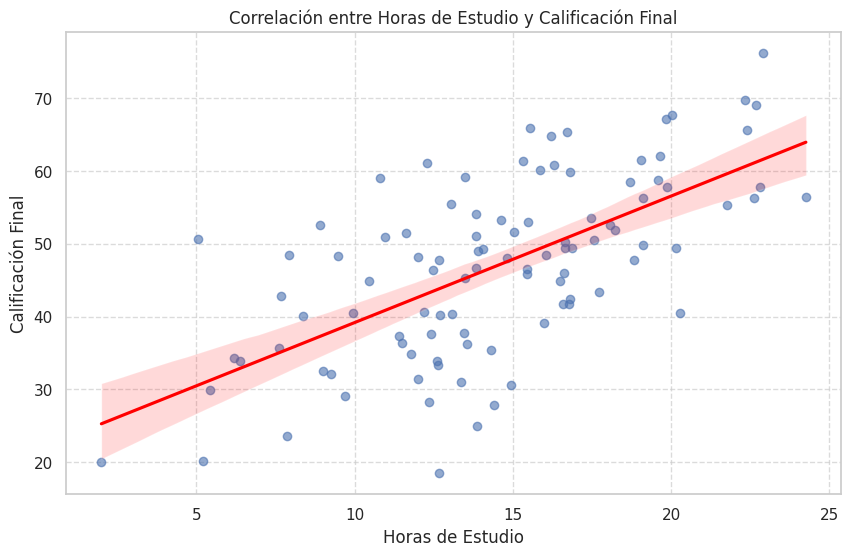

In [6]:
# Tu código aquí
# 1. Coeficiente de correlación de Pearson
correlacion_pearson = df_estudiantes['Horas_Estudio'].corr(df_estudiantes['Calificacion_Final'])
print(f"Coeficiente de Correlación de Pearson entre Horas_Estudio y Calificacion_Final: {correlacion_pearson:.2f}")

# 2. Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Horas_Estudio', y='Calificacion_Final', data=df_estudiantes, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlación entre Horas de Estudio y Calificación Final')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación Final')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

El gráfico muestra una correlación positiva moderada (0.64) entre horas de estudio y calificación final, lo que técnicamente indica que a medida que aumentan las horas dedicadas al estudio, también tienden a subir las notas; desde el modelo de negocio educativo, esto evidencia un comportamiento predecible donde el esfuerzo invertido genera mejores resultados, permitiendo justificar estrategias como fomentar hábitos de estudio, invertir en programas de acompañamiento académico y promover políticas basadas en datos que respalden la relación directa entre dedicación y desempeño.



### 7. Matriz de Correlación Completa
**Tarea:**
1. Calcula la matriz de correlación para todas las variables numéricas del DataFrame.
2. Visualiza esta matriz usando un **heatmap** de Seaborn (`sns.heatmap`). Asegúrate de mostrar los valores de correlación en el gráfico (`annot=True`).

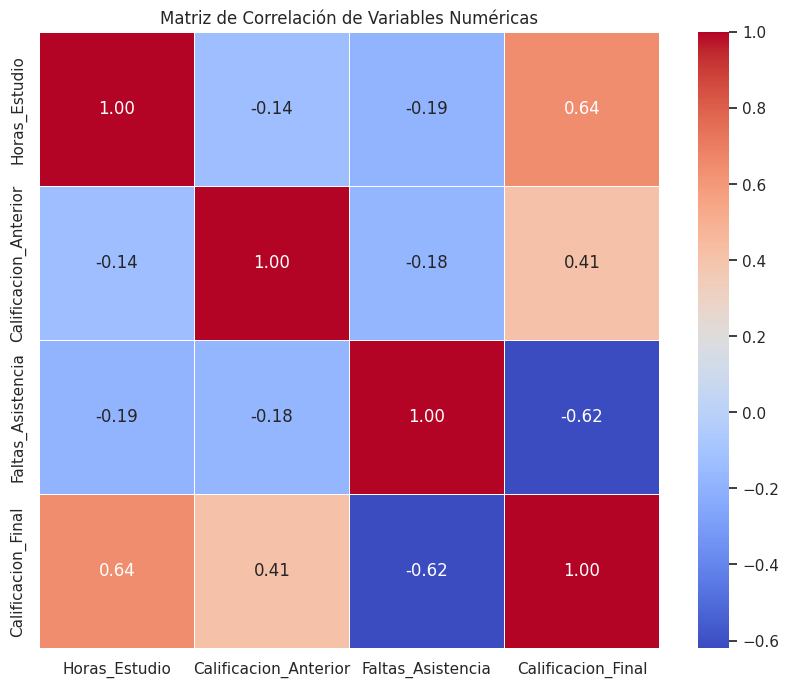

In [7]:
# Tu código aquí

# Seleccionar solo las columnas numéricas para la matriz de correlación
df_numeric = df_estudiantes.select_dtypes(include=np.number)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

La matriz de correlación revela que el rendimiento académico final está fuertemente influenciado por las horas de estudio (correlación de 0.64) y negativamente por las faltas de asistencia (-0.62), lo que indica que estudiar más y asistir regularmente mejora significativamente las calificaciones; además, las notas anteriores tienen una relación moderada (0.41), útil para prever el desempeño futuro. Desde un enfoque de modelo de negocio educativo, estos datos permiten segmentar estudiantes, diseñar intervenciones personalizadas, optimizar recursos en tutorías y control de asistencia, y justificar inversiones en plataformas que fomenten el estudio, todo con base en evidencia estadística que respalda decisiones estratégicas para mejorar la calidad académica.

### 8. Análisis Descriptivo por Categorías
**Tarea:**
1. Usa `.groupby()` para agrupar los datos por la columna `Usa_Tutor`.
2. Calcula las estadísticas descriptivas (`.describe()`) de `Calificacion_Final` para cada grupo (Sí y No).
3. Crea un **Box Plot** (`sns.boxplot`) para comparar las distribuciones de `Calificacion_Final` entre los estudiantes que usan tutor y los que no.

Estadísticas Descriptivas de Calificación Final por Uso de Tutor:
           count       mean        std        min        25%        50%  \
Usa_Tutor                                                                 
No          72.0  46.656313  11.600601  18.498193  37.505894  47.927879   
Sí          28.0  47.766843  13.999161  20.100809  40.177907  49.328021   

                 75%        max  
Usa_Tutor                        
No         53.039295  76.166286  
Sí         56.986544  69.020505  


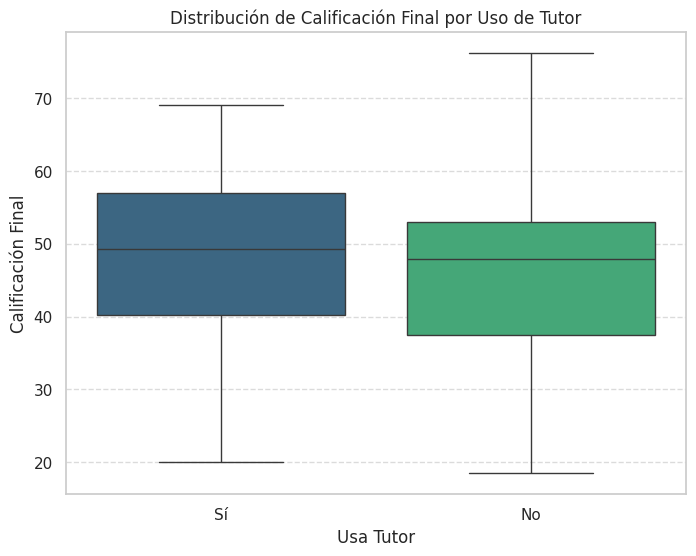

In [8]:
# Tu código aquí

# 1. Agrupar por 'Usa_Tutor' y calcular estadísticas descriptivas de 'Calificacion_Final'
estadisticas_por_tutor = df_estudiantes.groupby('Usa_Tutor')['Calificacion_Final'].describe()
print("Estadísticas Descriptivas de Calificación Final por Uso de Tutor:")
print(estadisticas_por_tutor)

# 2. Crear un Box Plot para comparar las distribuciones
plt.figure(figsize=(8, 6))
sns.boxplot(x='Usa_Tutor', y='Calificacion_Final', data=df_estudiantes, hue='Usa_Tutor', palette='viridis', legend=False)
plt.title('Distribución de Calificación Final por Uso de Tutor')
plt.xlabel('Usa Tutor')
plt.ylabel('Calificación Final')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El análisis estadístico muestra que los estudiantes que utilizaron tutoría obtuvieron en promedio una calificación final ligeramente superior (47.77 vs. 46.66), con una mediana también más alta (49.33 vs. 47.93), lo que sugiere un beneficio modesto pero consistente; además, el rango intercuartílico y la desviación estándar indican mayor dispersión entre los tutelados, lo que podría reflejar diversidad en el impacto de la tutoría. Desde una perspectiva de modelo de negocio educativo, estos datos respaldan la implementación o promoción de servicios de tutoría como estrategia para mejorar el rendimiento académico, justificar inversión institucional, y ofrecer valor agregado en programas de formación, especialmente si se segmenta por perfiles que más se benefician del acompañamiento personalizado.

## ¡Excelente Trabajo!
Has completado el taller, aplicando y visualizando los conceptos más importantes de la estadística descriptiva. Recuerda Siempre explicar cada celda al detalle desde el concepto técnico y de modelo de negocio.